In [1]:
from platform import python_version
print(python_version())

3.8.8


In [2]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [3]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [76]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3153680311815288918
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7055540224
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9933449839274132756
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 980M, pci bus id: 0000:01:00.0, compute capability: 5.2"
xla_global_id: 416903419
]


In [5]:
import pandas as pd

In [6]:
df = pd.read_json("mappingv3.json")

In [7]:
str(df["action_instances"][0]).split("name")

["[{'options': [{'id': 601225, '",
 '\': \'new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, \'',
 "': 'new email in inbox from', 'params': {'email address': 'contact@gs-store.de'}}]}, {'id': 700000, '",
 "': 'make a payment', 'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}}, {'id': 600603, '",
 "': 'send an email', 'params': {'attachment url': '<return2>', 'to address': 'contact@gs-store.de'}}]"]

In [8]:
df["action_instances"][0]

[{'options': [{'id': 601225,
    'name': 'new email from',
    'params': {"sender's address": 'contact@gs-store.de'}},
   {'id': 600599,
    'name': 'new email in inbox from',
    'params': {'email address': 'contact@gs-store.de'}}]},
 {'id': 700000,
  'name': 'make a payment',
  'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}},
 {'id': 600603,
  'name': 'send an email',
  'params': {'attachment url': '<return2>',
   'to address': 'contact@gs-store.de'}}]

In [9]:
len(df["action_instances"][0])

3

In [10]:
type(df["action_instances"][0][0])

dict

In [11]:
df["action_instances"][0][0]

{'options': [{'id': 601225,
   'name': 'new email from',
   'params': {"sender's address": 'contact@gs-store.de'}},
  {'id': 600599,
   'name': 'new email in inbox from',
   'params': {'email address': 'contact@gs-store.de'}}]}

In [12]:
str(df["action_instances"][0])

'[{\'options\': [{\'id\': 601225, \'name\': \'new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, \'name\': \'new email in inbox from\', \'params\': {\'email address\': \'contact@gs-store.de\'}}]}, {\'id\': 700000, \'name\': \'make a payment\', \'params\': {\'invoice\': \'<return1>.attachment\', \'method\': \'credit card\'}}, {\'id\': 600603, \'name\': \'send an email\', \'params\': {\'attachment url\': \'<return2>\', \'to address\': \'contact@gs-store.de\'}}]'

In [13]:
df["action_instances"][0]

[{'options': [{'id': 601225,
    'name': 'new email from',
    'params': {"sender's address": 'contact@gs-store.de'}},
   {'id': 600599,
    'name': 'new email in inbox from',
    'params': {'email address': 'contact@gs-store.de'}}]},
 {'id': 700000,
  'name': 'make a payment',
  'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}},
 {'id': 600603,
  'name': 'send an email',
  'params': {'attachment url': '<return2>',
   'to address': 'contact@gs-store.de'}}]

In [14]:
str(df["action_instances"][0]).split("\'name\': \'")

["[{'options': [{'id': 601225, ",
 'new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, ',
 "new email in inbox from', 'params': {'email address': 'contact@gs-store.de'}}]}, {'id': 700000, ",
 "make a payment', 'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}}, {'id': 600603, ",
 "send an email', 'params': {'attachment url': '<return2>', 'to address': 'contact@gs-store.de'}}]"]

In [15]:
data = str(df["action_instances"][0]).split("\'name\': \'")[1:]
data

['new email from\', \'params\': {"sender\'s address": \'contact@gs-store.de\'}}, {\'id\': 600599, ',
 "new email in inbox from', 'params': {'email address': 'contact@gs-store.de'}}]}, {'id': 700000, ",
 "make a payment', 'params': {'invoice': '<return1>.attachment', 'method': 'credit card'}}, {'id': 600603, ",
 "send an email', 'params': {'attachment url': '<return2>', 'to address': 'contact@gs-store.de'}}]"]

In [16]:
for everyData in data:
    print(everyData.find("'"))
    val = everyData.find("'")
    print(everyData[:val])

14
new email from
23
new email in inbox from
14
make a payment
13
send an email


In [17]:
actions_val = []
for everyCommand in df["action_instances"]:
    data = str(everyCommand).split("\'name\': \'")[1:]
    temp = []
    for everyData in data:
        val = everyData.find("'")
        temp.append(everyData[:val])
    actions_val.append(temp)    

In [18]:
actions_val

[['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new email from',
  'new email in inbox from',
  'make a payment',
  'send an email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['new deposit in your account from sender', 'send an email', 'send email'],
 ['read file content',
  'translate',
  'translate',
  'translate',
  'create a text file',
  'create a text file',
  'create a document',
  'send an email'],
 ['read file content',
  'translate',
  'translate',
  'translate',
  'send an email',
 

In [19]:
df["action_instances"][10]

[{'id': 700002,
  'name': 'read file content',
  'params': {'file': 'question.doc'}},
 {'options': [{'id': 501371,
    'name': 'translate',
    'params': {'from': 'en', 'text': '<return1>', 'to': 'pt'}},
   {'id': 501915,
    'name': 'translate',
    'params': {'languageConverted': 'en',
     'languageToConvert': 'pt',
     'text': '<return1>'}},
   {'id': 503292,
    'name': 'translate',
    'params': {'input': '<return1>', 'source': 'en', 'target': 'pt'}}]},
 {'options': [{'id': 600603,
    'name': 'send an email',
    'params': {'body': '<return2>', 'to address': 'sandra@andrade.com.br'}},
   {'id': 601227,
    'name': 'send email',
    'params': {'body': '<return2>', 'recipients': 'sandra@andrade.com.br'}}]}]

In [20]:
df["nl_command_statment"].iloc[10]

'Find "question.doc" and translate the content of the file from English into Portuguese. Send this new text to Sandra. Once she sends back the reviewed message, send it to Brazilian embassy.'

In [21]:
import itertools
s = ",".join(itertools.chain(*actions_val))

In [22]:
len(set(s.split(",")))

73

In [23]:
for val in actions_val:
    print(len(val))

4
4
4
4
4
3
3
3
3
8
6
6
8
4
8
8
8
8
8
2
2
2
2
2
2
2
2
3
3
5
5
5
5
5
2
2
2
2
2
2
3
3
3
3
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
6
6
6
6
6
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
2
2
2
2
14
10
8
6
4
6
4
5
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
4
3
4
5
3
3
3
3
3
4
3
3
2
3
3
2
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
7
1
1
1
1
1
7
7
2
2
2
1
3
2
12
5


In [24]:
temp = []
for val in actions_val:
    temp.append(len(val))

In [25]:
max(temp), min(temp)

(14, 1)

In [26]:
temp.index(14)

95

In [27]:
actions_val[95]

['new email from',
 'new email in inbox from',
 'read file content',
 'translate',
 'translate',
 'translate',
 'create a text file',
 'create a text file',
 'create a document',
 'send an email',
 'new email from',
 'new email in inbox from',
 'send an email',
 'send email']

In [28]:
df["action_instances"][95]

[{'options': [{'id': 601225,
    'name': 'new email from',
    'params': {"sender's address": 'carmen@souza.cl'}},
   {'id': 600599,
    'name': 'new email in inbox from',
    'params': {'email address': 'carmen@souza.cl'}}]},
 {'id': 700002,
  'name': 'read file content',
  'params': {'file': '<return1>.attachment'}},
 {'options': [{'id': 501371,
    'name': 'translate',
    'params': {'from': 'de', 'text': '<return2>', 'to': 'en'}},
   {'id': 501915,
    'name': 'translate',
    'params': {'languageConverted': 'de',
     'languageToConvert': 'en',
     'text': '<return2>'}},
   {'id': 503292,
    'name': 'translate',
    'params': {'input': '<return2>', 'source': 'de', 'target': 'en'}}]},
 {'options': [{'id': 600209,
    'name': 'create a text file',
    'params': {'content': '<return3>', 'file name': 'english-version.txt'}},
   {'id': 600350,
    'name': 'create a text file',
    'params': {'content': '<return3>', 'file name': 'english-version.txt'}},
   {'id': 600614,
    'name': '

In [29]:
df["nl_command_statment"].iloc[95]

'Get the CV attached to a new email sent by Carmen Souza. Translate it from German to English saving the content in "english-version.txt" and send the new copy to Maria Helena by email saying: Please, see if this candidate is suitable for our opened position. When she answers, forward the message to Mrs Souza.'

In [30]:
df["only_actions"] = actions_val

In [31]:
df.head()

,action_instances,id,nl_command_statment,only_actions
0,"[{'options': [{'id': 601225, 'name': 'new emai...",101,Pay the invoice that I will receive from conta...,"[new email from, new email in inbox from, make..."
1,"[{'options': [{'id': 601225, 'name': 'new emai...",102,Pay in the bank my purchases that I will soon ...,"[new email from, new email in inbox from, make..."
2,"[{'options': [{'id': 601225, 'name': 'new emai...",105,Make a payment using my bank account when I re...,"[new email from, new email in inbox from, make..."
3,"[{'options': [{'id': 601225, 'name': 'new emai...",106,Pay my Good Sports Store account balance using...,"[new email from, new email in inbox from, make..."
4,"[{'options': [{'id': 601225, 'name': 'new emai...",107,Wait for a new email from the sender contact@g...,"[new email from, new email in inbox from, make..."


In [32]:
# df["new_input"] = "<boF> " + df["nl_command_statment"] 
df["new_input"] = df["nl_command_statment"] 

In [33]:
df.head()

,action_instances,id,nl_command_statment,only_actions,new_input
0,"[{'options': [{'id': 601225, 'name': 'new emai...",101,Pay the invoice that I will receive from conta...,"[new email from, new email in inbox from, make...",Pay the invoice that I will receive from conta...
1,"[{'options': [{'id': 601225, 'name': 'new emai...",102,Pay in the bank my purchases that I will soon ...,"[new email from, new email in inbox from, make...",Pay in the bank my purchases that I will soon ...
2,"[{'options': [{'id': 601225, 'name': 'new emai...",105,Make a payment using my bank account when I re...,"[new email from, new email in inbox from, make...",Make a payment using my bank account when I re...
3,"[{'options': [{'id': 601225, 'name': 'new emai...",106,Pay my Good Sports Store account balance using...,"[new email from, new email in inbox from, make...",Pay my Good Sports Store account balance using...
4,"[{'options': [{'id': 601225, 'name': 'new emai...",107,Wait for a new email from the sender contact@g...,"[new email from, new email in inbox from, make...",Wait for a new email from the sender contact@g...


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
#convert sentences to word tokens and find length of vocab and max sentence length for input and output

input_tokenizer = Tokenizer()
input_tokenizer.fit_on_texts(df['new_input'])
Source_vocabulary = input_tokenizer.word_index.keys()

In [36]:
output_tokenizer = Tokenizer()
output_tokenizer.fit_on_texts( df['only_actions'] )
target_vocabulary = output_tokenizer.word_index.keys()

In [37]:
input_int = input_tokenizer.texts_to_sequences(df['new_input'])
output_int = output_tokenizer.texts_to_sequences(df['only_actions'])

In [38]:
max_source_seq_length =  len(max( input_int ,key=len))

max_target_seq_length = len(max( output_int ,key=len))

num_source_tokens = len(input_tokenizer.word_counts)

num_target_tokens = len(output_tokenizer.word_counts)

number_of_samples = df.shape[0]


print('Number of samples:', number_of_samples )
print('Number of unique source language tokens:', num_source_tokens)
print('Number of unique target language tokens:', num_target_tokens)
print('Max sequence length of source language:', max_source_seq_length)
print('Max sequence length of target language:', max_target_seq_length)
print("Source Vocabulary",list(Source_vocabulary)[:10])
print("Target Vocabulary",list(target_vocabulary)[:10])

Number of samples: 180
Number of unique source language tokens: 662
Number of unique target language tokens: 73
Max sequence length of source language: 56
Max sequence length of target language: 14
Source Vocabulary ['the', 'to', 'my', 'in', 'send', 'and', 'a', 'it', 'on', 'of']
Target Vocabulary ['send an email', 'send email', 'new email from', 'new email in inbox from', 'post message', 'change color', 'search image on flickr', 'tweets from search', 'translate', 'new item from search']


In [39]:
import fasttext
import fasttext.util

# English Embeddings 
fasttext_model = fasttext.load_model(r"D:\jupyter_notebook_project\NUIG\SEM 2\advance NLP\assignmentsssssssss\assignment 3\cc.en.300.bin")
# fasttext_dict = {word: model.get_word_vector(word) for word in model.get_words()}
# del model

In [40]:
import numpy as np

pad_input = np.zeros((max_source_seq_length, num_source_tokens), dtype='float32')

pad_output = np.zeros((max_target_seq_length, num_target_tokens), dtype='float32')

In [41]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import losses
from tensorflow.keras.layers import Input, LSTM, Dense,Flatten, TimeDistributed, SimpleRNN, Flatten , Reshape, Embedding
from tensorflow.keras.models import Model, Sequential

embed_mat_english = np.zeros((num_source_tokens+1, 300))
for value, position in input_tokenizer.word_index.items():
    embedding_vect = fasttext_model.get_word_vector(value)
    if embedding_vect is not None:
        embed_mat_english[position] = embedding_vect
    else:
        print("Hits value " , value ," position " , position)

english_layer_embedding = Embedding(num_source_tokens+1, 300, 
                         weights = [embed_mat_english],
                            input_length = max_source_seq_length , 
                                    trainable = False,
                                mask_zero = True) #using pre-trained embeddings

In [42]:
#pad the sequences to the same length
pad_input_val = pad_sequences(input_int, maxlen=max_source_seq_length,padding='post')
print("endcoder input shape", pad_input_val.shape)

#add padding for encoder after the sentence integers
pad_output_val = pad_sequences(output_int, maxlen=max_target_seq_length,padding='post' )
print("decoder input shape", pad_output_val.shape)

endcoder input shape (180, 56)
decoder input shape (180, 14)


In [43]:
reshaped_input = pad_input_val.reshape(180, 56, 1)
reshaped_output = pad_output_val.reshape(180, 14)

In [44]:
reshaped_input.shape, reshaped_output.shape

((180, 56, 1), (180, 14))

In [45]:
reshaped_input

array([[[193],
        [  1],
        [299],
        ...,
        [  0],
        [  0],
        [  0]],

       [[193],
        [  4],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]],

       [[199],
        [  7],
        [126],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[109],
        [  1],
        [ 66],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 26],
        [  1],
        [ 32],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 26],
        [  1],
        [ 32],
        ...,
        [  0],
        [  0],
        [  0]]])

In [46]:


# x=Input(shape=(timestep,n_feature))
# model=LSTM(8)(x)
# model=Dense(2)(model)
# myModel=Model(x,model)

# tdd = Input(shape= (56) )

# x = english_layer_embedding(tdd)

# model= LSTM(56, return_sequences=True)(x)

# # tdd = TimeDistributed(Dense(100))
# # model = tdd(model)

# tdd = Dense(64, activation="relu")
# model = tdd(model)

# tdd = Dense(32, activation="relu")
# model = tdd(model)

# # tdd = Reshape([14])
# # model = tdd(model)

# tdd = Dense(14, activation="relu")
# model = tdd(model)

# myModel=Model(x,model)


model = Sequential()
model.add(english_layer_embedding)
model.add(LSTM(56, return_sequences=True))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Flatten())
model.add(Dense(14, activation="relu"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 56, 300)           198900    
                                                                 
 lstm (LSTM)                 (None, 56, 56)            79968     
                                                                 
 dense (Dense)               (None, 56, 64)            3648      
                                                                 
 dense_1 (Dense)             (None, 56, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 56, 14)            462       
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 14)                1

In [53]:
# model.compile(optimizer='RMSprop', loss="categorical_crossentropy" ,metrics=['accuracy'])
model.compile(optimizer='RMSprop', loss= losses.CategoricalCrossentropy()  ,metrics=['accuracy'])
# model.compile(optimizer='RMSprop', loss= losses.sparse_categorical_crossentropy  ,metrics=['accuracy'])

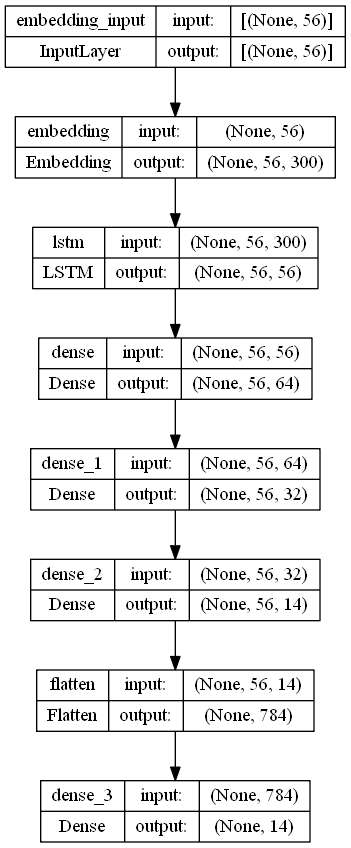

In [54]:
plot_model(model, show_shapes=True)

In [55]:
print(reshaped_input.shape, reshaped_output.shape )
history = model.fit(reshaped_input , reshaped_output,  epochs=500, batch_size=None)

(180, 56, 1) (180, 14)
Epoch 1/1000
6/6 [==============================] - 8s 77ms/step - loss: 258.8185 - accuracy: 0.3056
Epoch 2/1000
6/6 [==============================] - 0s 75ms/step - loss: 178.2432 - accuracy: 0.3833
Epoch 3/1000
6/6 [==============================] - 0s 60ms/step - loss: 173.1152 - accuracy: 0.4444
Epoch 4/1000
6/6 [==============================] - 0s 52ms/step - loss: 165.4087 - accuracy: 0.4222
Epoch 5/1000
6/6 [==============================] - 0s 50ms/step - loss: 165.6950 - accuracy: 0.4444
Epoch 6/1000
6/6 [==============================] - 0s 54ms/step - loss: 165.3733 - accuracy: 0.4167
Epoch 7/1000
6/6 [==============================] - 0s 49ms/step - loss: 164.3862 - accuracy: 0.4278
Epoch 8/1000
6/6 [==============================] - 0s 49ms/step - loss: 160.4093 - accuracy: 0.4556
Epoch 9/1000
6/6 [==============================] - 0s 51ms/step - loss: 158.9821 - accuracy: 0.5056
Epoch 10/1000
6/6 [==============================] - 0s 42ms/step - 

6/6 [==============================] - 0s 39ms/step - loss: 141.1732 - accuracy: 0.8333
Epoch 82/1000
6/6 [==============================] - 0s 39ms/step - loss: 142.7947 - accuracy: 0.7833
Epoch 83/1000
6/6 [==============================] - 0s 39ms/step - loss: 140.9659 - accuracy: 0.8333
Epoch 84/1000
6/6 [==============================] - 0s 39ms/step - loss: 143.2884 - accuracy: 0.7556
Epoch 85/1000
6/6 [==============================] - 0s 40ms/step - loss: 140.6821 - accuracy: 0.7722
Epoch 86/1000
6/6 [==============================] - 0s 38ms/step - loss: 140.1812 - accuracy: 0.7833
Epoch 87/1000
6/6 [==============================] - 0s 39ms/step - loss: 140.3525 - accuracy: 0.6278
Epoch 88/1000
6/6 [==============================] - 0s 39ms/step - loss: 140.5329 - accuracy: 0.8111
Epoch 89/1000
6/6 [==============================] - 0s 39ms/step - loss: 141.7528 - accuracy: 0.7889
Epoch 90/1000
6/6 [==============================] - 0s 40ms/step - loss: 140.0456 - accuracy: 0

6/6 [==============================] - 0s 32ms/step - loss: 137.6105 - accuracy: 0.7722
Epoch 161/1000
6/6 [==============================] - 0s 30ms/step - loss: 138.7327 - accuracy: 0.7278
Epoch 162/1000
6/6 [==============================] - 0s 31ms/step - loss: 137.0347 - accuracy: 0.8056
Epoch 163/1000
6/6 [==============================] - 0s 32ms/step - loss: 138.7112 - accuracy: 0.8500
Epoch 164/1000
6/6 [==============================] - 0s 33ms/step - loss: 138.1139 - accuracy: 0.8611
Epoch 165/1000
6/6 [==============================] - 0s 32ms/step - loss: 136.7158 - accuracy: 0.8556
Epoch 166/1000
6/6 [==============================] - 0s 34ms/step - loss: 136.9754 - accuracy: 0.8556
Epoch 167/1000
6/6 [==============================] - 0s 36ms/step - loss: 136.1864 - accuracy: 0.8722
Epoch 168/1000
6/6 [==============================] - 0s 47ms/step - loss: 137.3836 - accuracy: 0.8222
Epoch 169/1000
6/6 [==============================] - 0s 52ms/step - loss: 136.4700 - ac

6/6 [==============================] - 0s 33ms/step - loss: 135.9159 - accuracy: 0.8333
Epoch 240/1000
6/6 [==============================] - 0s 32ms/step - loss: 135.5366 - accuracy: 0.8111
Epoch 241/1000
6/6 [==============================] - 0s 34ms/step - loss: 135.2448 - accuracy: 0.8222
Epoch 242/1000
6/6 [==============================] - 0s 32ms/step - loss: 135.0411 - accuracy: 0.8278
Epoch 243/1000
6/6 [==============================] - 0s 34ms/step - loss: 134.9981 - accuracy: 0.8167
Epoch 244/1000
6/6 [==============================] - 0s 42ms/step - loss: 134.6515 - accuracy: 0.8278
Epoch 245/1000
6/6 [==============================] - 0s 48ms/step - loss: 134.3461 - accuracy: 0.8500
Epoch 246/1000
6/6 [==============================] - 0s 51ms/step - loss: 134.1513 - accuracy: 0.8667
Epoch 247/1000
6/6 [==============================] - 0s 50ms/step - loss: 134.1899 - accuracy: 0.8444
Epoch 248/1000
6/6 [==============================] - 0s 50ms/step - loss: 134.3774 - ac

6/6 [==============================] - 0s 32ms/step - loss: 134.1823 - accuracy: 0.8556
Epoch 319/1000
6/6 [==============================] - 0s 34ms/step - loss: 134.1812 - accuracy: 0.8778
Epoch 320/1000
6/6 [==============================] - 0s 33ms/step - loss: 134.7400 - accuracy: 0.8556
Epoch 321/1000
6/6 [==============================] - 0s 39ms/step - loss: 135.6522 - accuracy: 0.7556
Epoch 322/1000
6/6 [==============================] - 0s 48ms/step - loss: 134.5189 - accuracy: 0.8222
Epoch 323/1000
6/6 [==============================] - 0s 39ms/step - loss: 134.1142 - accuracy: 0.8944
Epoch 324/1000
6/6 [==============================] - 0s 41ms/step - loss: 134.1271 - accuracy: 0.8667
Epoch 325/1000
6/6 [==============================] - 0s 38ms/step - loss: 134.0266 - accuracy: 0.8167
Epoch 326/1000
6/6 [==============================] - 0s 41ms/step - loss: 134.0859 - accuracy: 0.8500
Epoch 327/1000
6/6 [==============================] - 0s 41ms/step - loss: 133.8135 - ac

6/6 [==============================] - 0s 31ms/step - loss: 133.7473 - accuracy: 0.8611
Epoch 398/1000
6/6 [==============================] - 0s 30ms/step - loss: 134.5311 - accuracy: 0.8611
Epoch 399/1000
6/6 [==============================] - 0s 31ms/step - loss: 134.2268 - accuracy: 0.8389
Epoch 400/1000
6/6 [==============================] - 0s 33ms/step - loss: 134.5719 - accuracy: 0.7667
Epoch 401/1000
6/6 [==============================] - 0s 44ms/step - loss: 133.9981 - accuracy: 0.8611
Epoch 402/1000
6/6 [==============================] - 0s 47ms/step - loss: 133.7307 - accuracy: 0.8722
Epoch 403/1000
6/6 [==============================] - 0s 46ms/step - loss: 133.5890 - accuracy: 0.8778
Epoch 404/1000
6/6 [==============================] - 0s 47ms/step - loss: 134.2004 - accuracy: 0.8444
Epoch 405/1000
6/6 [==============================] - 0s 47ms/step - loss: 134.3860 - accuracy: 0.8944
Epoch 406/1000
6/6 [==============================] - 0s 47ms/step - loss: 133.6697 - ac

6/6 [==============================] - 0s 49ms/step - loss: 132.1303 - accuracy: 0.8667
Epoch 477/1000
6/6 [==============================] - 0s 49ms/step - loss: 133.3322 - accuracy: 0.8667
Epoch 478/1000
6/6 [==============================] - 0s 51ms/step - loss: 132.9635 - accuracy: 0.9000
Epoch 479/1000
6/6 [==============================] - 0s 51ms/step - loss: 132.4129 - accuracy: 0.8889
Epoch 480/1000
6/6 [==============================] - 0s 45ms/step - loss: 132.9913 - accuracy: 0.8500
Epoch 481/1000
6/6 [==============================] - 0s 37ms/step - loss: 132.6931 - accuracy: 0.8722
Epoch 482/1000
6/6 [==============================] - 0s 37ms/step - loss: 132.7365 - accuracy: 0.8722
Epoch 483/1000
6/6 [==============================] - 0s 37ms/step - loss: 132.2162 - accuracy: 0.8833
Epoch 484/1000
6/6 [==============================] - 0s 38ms/step - loss: 132.5952 - accuracy: 0.8778
Epoch 485/1000
6/6 [==============================] - 0s 37ms/step - loss: 133.3963 - ac

6/6 [==============================] - 0s 35ms/step - loss: 132.3502 - accuracy: 0.8889
Epoch 556/1000
6/6 [==============================] - 0s 35ms/step - loss: 132.0937 - accuracy: 0.8944
Epoch 557/1000
6/6 [==============================] - 0s 33ms/step - loss: 132.0171 - accuracy: 0.8778
Epoch 558/1000
6/6 [==============================] - 0s 33ms/step - loss: 132.0286 - accuracy: 0.8667
Epoch 559/1000
6/6 [==============================] - 0s 57ms/step - loss: 132.3286 - accuracy: 0.9056
Epoch 560/1000
6/6 [==============================] - 0s 55ms/step - loss: 132.4507 - accuracy: 0.8556
Epoch 561/1000
6/6 [==============================] - 0s 52ms/step - loss: 132.2803 - accuracy: 0.8167
Epoch 562/1000
6/6 [==============================] - 0s 51ms/step - loss: 132.4407 - accuracy: 0.8556
Epoch 563/1000
6/6 [==============================] - 0s 57ms/step - loss: 132.4216 - accuracy: 0.8667
Epoch 564/1000
6/6 [==============================] - 0s 56ms/step - loss: 132.2799 - ac

6/6 [==============================] - 0s 36ms/step - loss: 131.8286 - accuracy: 0.9222
Epoch 635/1000
6/6 [==============================] - 0s 34ms/step - loss: 131.9465 - accuracy: 0.8944
Epoch 636/1000
6/6 [==============================] - 0s 32ms/step - loss: 131.9247 - accuracy: 0.8611
Epoch 637/1000
6/6 [==============================] - 0s 33ms/step - loss: 131.8817 - accuracy: 0.8833
Epoch 638/1000
6/6 [==============================] - 0s 34ms/step - loss: 131.9678 - accuracy: 0.9333
Epoch 639/1000
6/6 [==============================] - 0s 34ms/step - loss: 132.1697 - accuracy: 0.8667
Epoch 640/1000
6/6 [==============================] - 0s 32ms/step - loss: 131.7641 - accuracy: 0.8944
Epoch 641/1000
6/6 [==============================] - 0s 33ms/step - loss: 132.7788 - accuracy: 0.9167
Epoch 642/1000
6/6 [==============================] - 0s 33ms/step - loss: 132.3133 - accuracy: 0.8944
Epoch 643/1000
6/6 [==============================] - 0s 33ms/step - loss: 132.0489 - ac

6/6 [==============================] - 0s 50ms/step - loss: 132.5715 - accuracy: 0.9000
Epoch 714/1000
6/6 [==============================] - 0s 49ms/step - loss: 131.7164 - accuracy: 0.8778
Epoch 715/1000
6/6 [==============================] - 0s 47ms/step - loss: 131.4750 - accuracy: 0.8778
Epoch 716/1000
6/6 [==============================] - 0s 48ms/step - loss: 131.6215 - accuracy: 0.8667
Epoch 717/1000
6/6 [==============================] - 0s 51ms/step - loss: 131.8294 - accuracy: 0.8722
Epoch 718/1000
6/6 [==============================] - 0s 48ms/step - loss: 131.6171 - accuracy: 0.8611
Epoch 719/1000
6/6 [==============================] - 0s 40ms/step - loss: 131.4786 - accuracy: 0.8889
Epoch 720/1000
6/6 [==============================] - 0s 37ms/step - loss: 131.3638 - accuracy: 0.8611
Epoch 721/1000
6/6 [==============================] - 0s 39ms/step - loss: 131.3492 - accuracy: 0.8833
Epoch 722/1000
6/6 [==============================] - 0s 37ms/step - loss: 131.7607 - ac

6/6 [==============================] - 0s 35ms/step - loss: 131.7621 - accuracy: 0.8667
Epoch 793/1000
6/6 [==============================] - 0s 37ms/step - loss: 131.6026 - accuracy: 0.8889
Epoch 794/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.6058 - accuracy: 0.8667
Epoch 795/1000
6/6 [==============================] - 0s 38ms/step - loss: 131.5043 - accuracy: 0.8667
Epoch 796/1000
6/6 [==============================] - 0s 36ms/step - loss: 132.1725 - accuracy: 0.8389
Epoch 797/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.8173 - accuracy: 0.8167
Epoch 798/1000
6/6 [==============================] - 0s 36ms/step - loss: 131.5048 - accuracy: 0.9056
Epoch 799/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.3665 - accuracy: 0.9167
Epoch 800/1000
6/6 [==============================] - 0s 37ms/step - loss: 131.4176 - accuracy: 0.9000
Epoch 801/1000
6/6 [==============================] - 0s 36ms/step - loss: 131.5635 - ac

6/6 [==============================] - 0s 56ms/step - loss: 131.2555 - accuracy: 0.8556
Epoch 872/1000
6/6 [==============================] - 0s 52ms/step - loss: 131.8165 - accuracy: 0.9111
Epoch 873/1000
6/6 [==============================] - 0s 51ms/step - loss: 131.2770 - accuracy: 0.8389
Epoch 874/1000
6/6 [==============================] - 0s 55ms/step - loss: 131.4547 - accuracy: 0.9000
Epoch 875/1000
6/6 [==============================] - 0s 52ms/step - loss: 131.3523 - accuracy: 0.8500
Epoch 876/1000
6/6 [==============================] - 0s 53ms/step - loss: 131.3465 - accuracy: 0.8611
Epoch 877/1000
6/6 [==============================] - 0s 51ms/step - loss: 131.4122 - accuracy: 0.9222
Epoch 878/1000
6/6 [==============================] - 0s 52ms/step - loss: 132.1240 - accuracy: 0.8556
Epoch 879/1000
6/6 [==============================] - 0s 51ms/step - loss: 132.1850 - accuracy: 0.7833
Epoch 880/1000
6/6 [==============================] - 0s 54ms/step - loss: 131.5841 - ac

6/6 [==============================] - 0s 46ms/step - loss: 131.4252 - accuracy: 0.9056
Epoch 951/1000
6/6 [==============================] - 0s 45ms/step - loss: 131.5643 - accuracy: 0.9000
Epoch 952/1000
6/6 [==============================] - 0s 46ms/step - loss: 131.5264 - accuracy: 0.8389
Epoch 953/1000
6/6 [==============================] - 0s 47ms/step - loss: 131.7340 - accuracy: 0.9167
Epoch 954/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.5812 - accuracy: 0.8667
Epoch 955/1000
6/6 [==============================] - 0s 34ms/step - loss: 131.8414 - accuracy: 0.9333
Epoch 956/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.9612 - accuracy: 0.9389
Epoch 957/1000
6/6 [==============================] - 0s 34ms/step - loss: 131.7501 - accuracy: 0.9167
Epoch 958/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.5247 - accuracy: 0.8500
Epoch 959/1000
6/6 [==============================] - 0s 35ms/step - loss: 131.5894 - ac

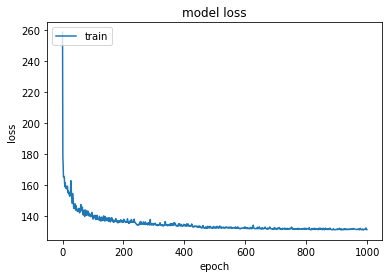

In [56]:
import matplotlib.pyplot as plt  
%matplotlib inline

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('foo.png')

In [92]:
int(np.mean(history.history['loss'])) , np.mean(history.history['accuracy']) *100

(134, 84.05777788758277)

In [86]:
np.mean(history.history['loss']) , np.mean(history.history['accuracy'])

(134.90460948181152, 0.8405777788758277)

In [62]:
reshaped_input[1][:][:]

array([[193],
       [  4],
       [  1],
       [127],
       [  3],
       [406],
       [ 31],
       [ 23],
       [ 73],
       [198],
       [ 46],
       [ 15],
       [ 55],
       [194],
       [ 74],
       [195],
       [  5],
       [  1],
       [407],
       [ 10],
       [126],
       [128],
       [  2],
       [  1],
       [ 74],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]])

In [63]:
reshaped_output[1][:][:]

array([ 3,  4, 31,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [64]:
reshaped_input[1][:][:].shape

(56, 1)

In [72]:
reshaped_input[:1 , : , : ].shape

(1, 56, 1)

In [73]:
model.predict( reshaped_input[:1 , : , : ]  )

1/1 [==============================] - 1s 1s/step


array([[ 2.125691  ,  2.5436006 , 20.442173  ,  0.96321297,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

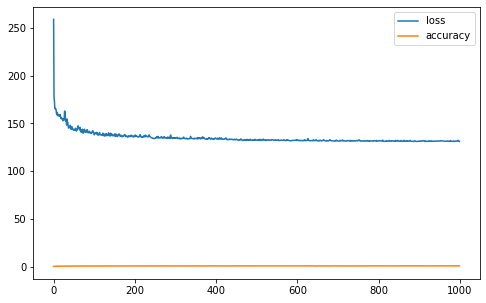

In [74]:
# # https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
# pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.show()